In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv
from skimage.morphology import convex_hull_image
from skimage.util import img_as_float
from PIL import Image
import csv

In [2]:
im = cv.imread('demo_img.jpg')

In [3]:
im_mask_gif = Image.open('demo_img_mask.gif')

In [4]:
im_mask = np.array(im_mask_gif)

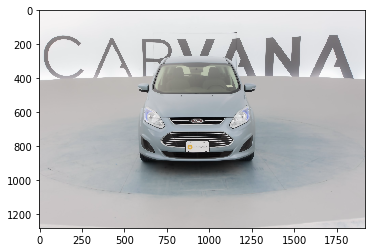

In [5]:
filimage = cv.bilateralFilter(im,9,75,75)
plt.imshow(filimage)

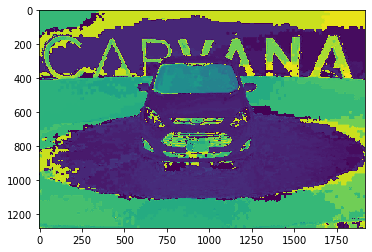

In [6]:
hsv=cv.cvtColor(filimage,cv.COLOR_BGR2HSV)
plt.imshow(hsv[:,:,0])

In [7]:
laplacian = cv.Laplacian(hsv[:,:,1],cv.CV_64F)

In [8]:
x=int(np.size(laplacian,0)/2)
y=int(np.size(laplacian,1)/2)
t=np.reshape(laplacian,np.size(laplacian))
dmax=0
m=t.mean()
std=t.std()
for i in range(0,np.size(laplacian,0)):
    for j in range(0,np.size(laplacian,1)):
        if abs(laplacian[i,j]-m)<=3*std:
            hsv[i,j,0]=0
            hsv[i,j,1]=0
            hsv[i,j,2]=0
#plt.imshow(hsv[:,:,0],cmap='gray', vmin=0, vmax=255)

In [9]:
im_bw = np.zeros(np.shape(hsv[:,:,1]),dtype=np.uint8)
for i in range(0,np.size(im_bw,0)):
    for j in range(0,np.size(im_bw,1)):
        if hsv[i,j,1]>0:
            im_bw[i,j]=255

#plt.imshow(im_bw)

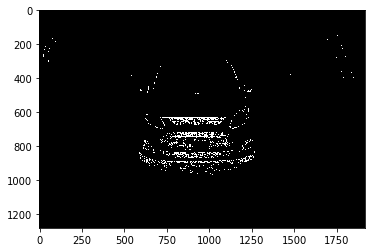

In [10]:
plt.imshow(im_bw, cmap='gray', vmin=0, vmax=255)

In [11]:
indices = np.argwhere(im_bw==255)
q1=[]
q2=[]
q3=[]
q4=[]
for i in range(0,len(indices)):
    indices[i][0]=indices[i][0]-x
    indices[i][1]=indices[i][1]-y
    point=np.array([indices[i][0],indices[i][1]])
    if indices[i][0]>=0 and indices[i][1]>=0:
        q1.append(point)
    elif indices[i][0]<0 and indices[i][1]>0:
        q2.append(point)
    elif indices[i][0]<0 and indices[i][1]<0:
        q3.append(point)
    else:
        q4.append(point)
            
q1=np.array(q1)
q2=np.array(q2)
q3=np.array(q3)
q4=np.array(q4)

In [12]:
dmq1=np.median([np.sqrt(p[0]**2+p[1]**2) for p in q1])
dstdq1=np.std([np.sqrt(p[0]**2+p[1]**2) for p in q1])
for p in q1:
    dist=np.sqrt(p[0]**2+p[1]**2)
    if p[1]>0 and dist-dmq1<dstdq1:
        slope=p[0]/float(p[1])
        for j in range(0,p[1]-1):
            i=int(np.floor(slope*j))
            if i<p[0]:
                im_bw[i+x,j+y]=255
    elif p[1]==0:
        for j in range(0,p[1]):
            im_bw[x,j+y]=255
    elif dist-dmq1>dstdq1:
        im_bw[p[0]+x,p[1]+y]=0

            

dmq2=np.median([np.sqrt(p[0]**2+p[1]**2) for p in q2])
dstdq2=np.std([np.sqrt(p[0]**2+p[1]**2) for p in q2])
for p in q2:
    dist=np.sqrt(p[0]**2+p[1]**2)
    if p[1]>0 and dist-dmq2<dstdq2:
        slope=p[0]/float(p[1])
        for j in range(0,p[1]-1):
            i=int(np.floor(slope*j))
            im_bw[i+x,j+y]=255
    elif dist-dmq2>dstdq2:
        im_bw[p[0]+x,p[1]+y]=0       

dmq3=np.median([np.sqrt(p[0]**2+p[1]**2) for p in q3])
dstdq3=np.std([np.sqrt(p[0]**2+p[1]**2) for p in q3])
for p in q3:
    dist=np.sqrt(p[0]**2+p[1]**2)
    if p[1]<0 and dist-dmq3<dstdq3:
        slope=p[0]/float(p[1])
        for j in range(p[1]+1,0):
            i=int(np.floor(slope*j))
            im_bw[i+x,j+y]=255
    elif dist-dmq3>dstdq3:
        im_bw[p[0]+x,p[1]+y]=0
dmq4=np.median([np.sqrt(p[0]**2+p[1]**2) for p in q4])
dstdq4=np.std([np.sqrt(p[0]**2+p[1]**2) for p in q4])
for p in q4:
    dist=np.sqrt(p[0]**2+p[1]**2)
    if p[1]<0 and dist-dmq4<dstdq4:
        slope=p[0]/float(p[1])
        for j in range(p[1]+1,0):
            i=int(np.floor(slope*j))
            im_bw[i+x,j+y]=255
    elif dist-dmq4>dstdq4:
        im_bw[p[0]+x,p[1]+y]=0

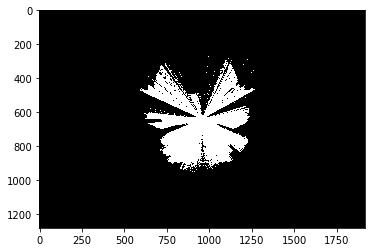

In [13]:
plt.imshow(im_bw,cmap='gray', vmin=0, vmax=255)

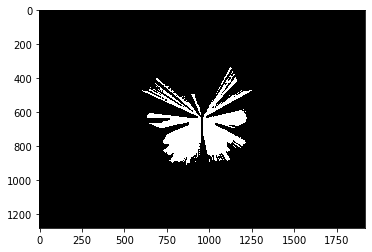

In [14]:
kernel = np.ones((3,3),np.uint8)
erosion = cv.erode(im_bw,kernel,iterations=3)
plt.imshow(erosion, cmap='gray', vmin=0, vmax=255)

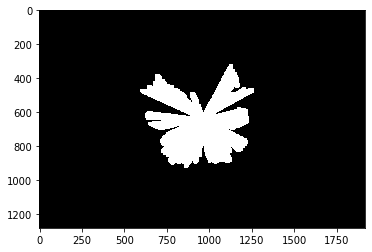

In [15]:
kernel = np.ones((3,3),np.uint8)
dilation = cv.dilate(erosion,kernel,iterations=10)
plt.imshow(dilation, cmap='gray', vmin=0, vmax=255)

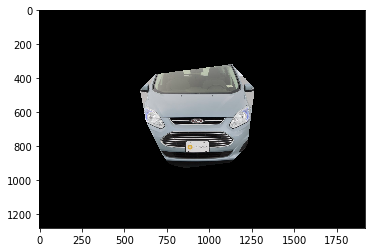

In [16]:
chull = convex_hull_image(img_as_float(dilation))
res= im.copy()
for i in range(0,np.size(chull,0)):
    for j in range(0,np.size(chull,1)):
        if chull[i,j]==0:
            res[i,j,:]=0
plt.imshow(res)

In [21]:
#Dice Coefficient
np.sum(im_mask[chull>0])*2+1)/(np.sum(chull)+np.sum(im_mask)+1))

[0.8712134507550802]